In [67]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----------------- ---------------------- 4.7/11.0 MB 40.9 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 47.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 32.7 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


In [5]:
# df = pd.read_csv(r"Datos Completos\Octubre-Abril.csv", sep= "\t", parse_dates=["PoC AB12"], dayfirst=True)
# df.columns = ["Date","Pax"]
# df = df.iloc[4:,:].reset_index(False)
# df = df.drop("index", axis=1)

# df["Date"] = pd.to_datetime(df["Date"],  format="%d-%m-%Y %H:%M:%S")
# df["Pax"] = pd.to_numeric(df["Pax"])

In [6]:
df_prod_fin = pd.read_csv(r"C:\Users\Victor\Desktop\Datathon\20240927 Reto UniversityHack 2024\Datos cultivos productivos\Fases producción v02 cultivo final.csv", sep = ";", encoding="ANSI")
df_prod_fin

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,23019,1,NaN,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,"82,4","17,3","91,2","1,84E+08",17825,NaN,NaN,"1747,9","6,0",NaN,NaN,NaN
1,23020,1,NaN,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,"80,4","18,8","91,2","1,82E+08",14246,NaN,NaN,"1676,2","6,6",NaN,NaN,NaN
2,23021,1,NaN,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,"66,4","16,2","86,4","2,48E+08",17825,NaN,NaN,"1928,5","8,1",NaN,NaN,NaN
3,23022,1,NaN,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,"85,6","18,5","83,2","2,30E+08",12912,NaN,NaN,"1782,8","5,9",NaN,NaN,NaN
4,23023,1,NaN,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,"77,6","17,1","74,4","1,33E+08",17825,"26,6","20,9","1861,8","3,0",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,NaN,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84,19,73,"1,65E+08",12912,31,17,"1342,8","4,9",NaN,NaN,NaN
148,24050,1,NaN,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84,18,68,"1,52E+08",6379,29,27,"1422,8","3,7",NaN,NaN,NaN
149,24051,1,NaN,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84,18,81,"1,61E+08",12912,33,19,"1486,6","5,5",NaN,NaN,NaN
150,24052,2,24050.0,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86,17,69,"1,48E+08",14246,24,18,"1857,3","6,0",NaN,NaN,NaN


In [7]:
df_prod_fin["Fecha/hora inicio"] = pd.to_datetime(df_prod_fin["Fecha/hora inicio"],  format="%Y-%m-%d %H:%M:%S")
df_prod_fin["Fecha/hora fin"] = pd.to_datetime(df_prod_fin["Fecha/hora fin"],  format="%Y-%m-%d %H:%M:%S")

In [8]:
df_prod_fin["Volumen de inóculo utilizado"] =df_prod_fin["Volumen de inóculo utilizado"].str.replace(",",".")
df_prod_fin["Turbidez inicio cultivo"] =df_prod_fin["Turbidez inicio cultivo"].str.replace(",",".")
df_prod_fin["Turbidez fin cultivo"] =df_prod_fin["Turbidez fin cultivo"].str.replace(",",".")
df_prod_fin["Viabilidad final cultivo"] =df_prod_fin["Viabilidad final cultivo"].str.replace(",",".")
df_prod_fin["Centrifugación 1 turbidez"] =df_prod_fin["Centrifugación 1 turbidez"].str.replace(",",".")
df_prod_fin["Centrifugación 2 turbidez"] =df_prod_fin["Centrifugación 2 turbidez"].str.replace(",",".")
df_prod_fin["Producto 1"] =df_prod_fin["Producto 1"].str.replace(",",".")
df_prod_fin["Producto 2"] =df_prod_fin["Producto 2"].str.replace(",",".")

In [9]:
df_prod_fin["Viabilidad final cultivo"] =df_prod_fin["Viabilidad final cultivo"].str.upper()

In [10]:
df_prod_fin.loc[67:67,"Viabilidad final cultivo"] = "1.82E+08"

In [11]:
df_prod_fin["Volumen de inóculo utilizado"] = pd.to_numeric(df_prod_fin["Volumen de inóculo utilizado"])
df_prod_fin["Turbidez inicio cultivo"] = pd.to_numeric(df_prod_fin["Turbidez inicio cultivo"])
df_prod_fin["Turbidez fin cultivo"] = pd.to_numeric(df_prod_fin["Turbidez fin cultivo"])
df_prod_fin["Viabilidad final cultivo"] = pd.to_numeric(df_prod_fin["Viabilidad final cultivo"])
df_prod_fin["Centrifugación 1 turbidez"] = pd.to_numeric(df_prod_fin["Centrifugación 1 turbidez"])
df_prod_fin["Centrifugación 2 turbidez"] = pd.to_numeric(df_prod_fin["Centrifugación 2 turbidez"])
df_prod_fin["Producto 1"] = pd.to_numeric(df_prod_fin["Producto 1"])
df_prod_fin["Producto 2"] = pd.to_numeric(df_prod_fin["Producto 2"])

In [12]:
df_prod_fin.describe()

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,152.000000,152.000000,22.000000,152.000000,152,152,147.000000,152.000000,152.000000,1.520000e+02,152.000000,148.000000,143.000000,152.000000,152.000000,0.0,0.0,0.0
mean,23323.151316,1.177632,23571.818182,14120.802632,2023-10-07 01:19:58.421052672,2023-10-09 01:27:14.605263360,81.455102,18.035526,74.419079,1.701737e+08,15098.026316,30.068919,23.572727,1658.318421,6.121711,NaN,NaN,NaN
min,23019.000000,1.000000,23085.000000,13169.000000,2023-03-21 07:30:00,2023-03-23 06:30:00,66.400000,12.600000,42.800000,7.040000e+07,6379.000000,21.300000,9.800000,526.400000,2.800000,NaN,NaN,NaN
25%,23060.750000,1.000000,23112.250000,13170.000000,2023-07-04 07:30:00,2023-07-06 08:30:00,80.000000,16.400000,69.075000,1.480000e+08,13912.500000,26.450000,17.750000,1466.775000,5.075000,NaN,NaN,NaN
50%,23101.500000,1.000000,23567.500000,14614.000000,2023-10-24 07:00:00,2023-10-26 08:15:00,81.600000,17.800000,74.300000,1.655000e+08,14246.000000,28.600000,20.700000,1675.400000,6.100000,NaN,NaN,NaN
75%,24003.250000,1.000000,24034.750000,14616.000000,2024-01-16 16:53:45,2024-01-18 15:06:15,82.800000,18.800000,81.050000,1.922500e+08,17825.000000,30.525000,25.000000,1853.825000,7.100000,NaN,NaN,NaN
max,24053.000000,3.000000,24051.000000,14617.000000,2024-03-25 13:28:00,2024-03-27 08:51:00,88.000000,44.400000,91.200000,3.700000e+08,17825.000000,168.800000,157.000000,2395.400000,9.200000,NaN,NaN,NaN
std,416.714932,0.416577,472.657697,687.944111,NaN,NaN,2.238829,3.295862,8.933668,3.829632e+07,2256.995283,15.165858,17.221552,307.717039,1.407450,NaN,NaN,NaN


In [13]:
df_prod_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 22 non-null     float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  147 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     14

In [14]:
df_prod_fin

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,23019,1,NaN,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.3,91.2,184000000.0,17825,NaN,NaN,1747.9,6.0,NaN,NaN,NaN
1,23020,1,NaN,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.8,91.2,182000000.0,14246,NaN,NaN,1676.2,6.6,NaN,NaN,NaN
2,23021,1,NaN,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.2,86.4,248000000.0,17825,NaN,NaN,1928.5,8.1,NaN,NaN,NaN
3,23022,1,NaN,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.5,83.2,230000000.0,12912,NaN,NaN,1782.8,5.9,NaN,NaN,NaN
4,23023,1,NaN,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.1,74.4,133000000.0,17825,26.6,20.9,1861.8,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,NaN,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,19.0,73.0,165000000.0,12912,31.0,17.0,1342.8,4.9,NaN,NaN,NaN
148,24050,1,NaN,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,18.0,68.0,152000000.0,6379,29.0,27.0,1422.8,3.7,NaN,NaN,NaN
149,24051,1,NaN,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,18.0,81.0,161000000.0,12912,33.0,19.0,1486.6,5.5,NaN,NaN,NaN
150,24052,2,24050.0,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.0,69.0,148000000.0,14246,24.0,18.0,1857.3,6.0,NaN,NaN,NaN


<Axes: >

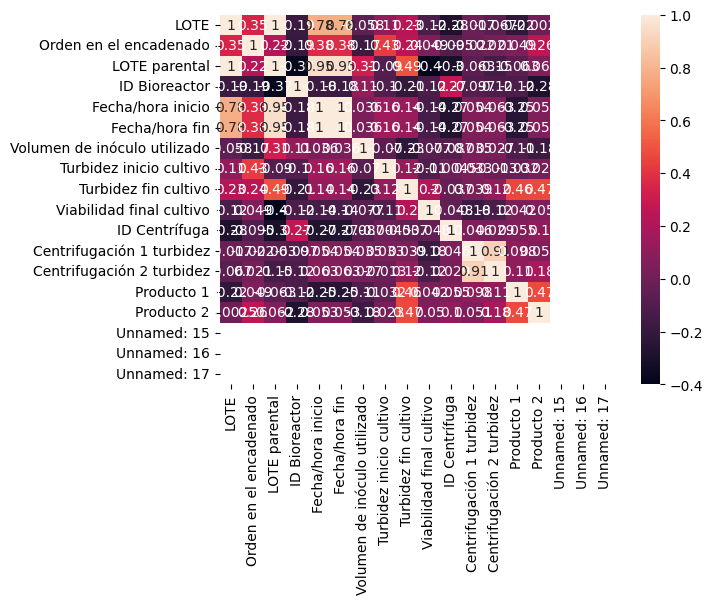

In [15]:
sns.heatmap(df_prod_fin.corr(), annot=True)

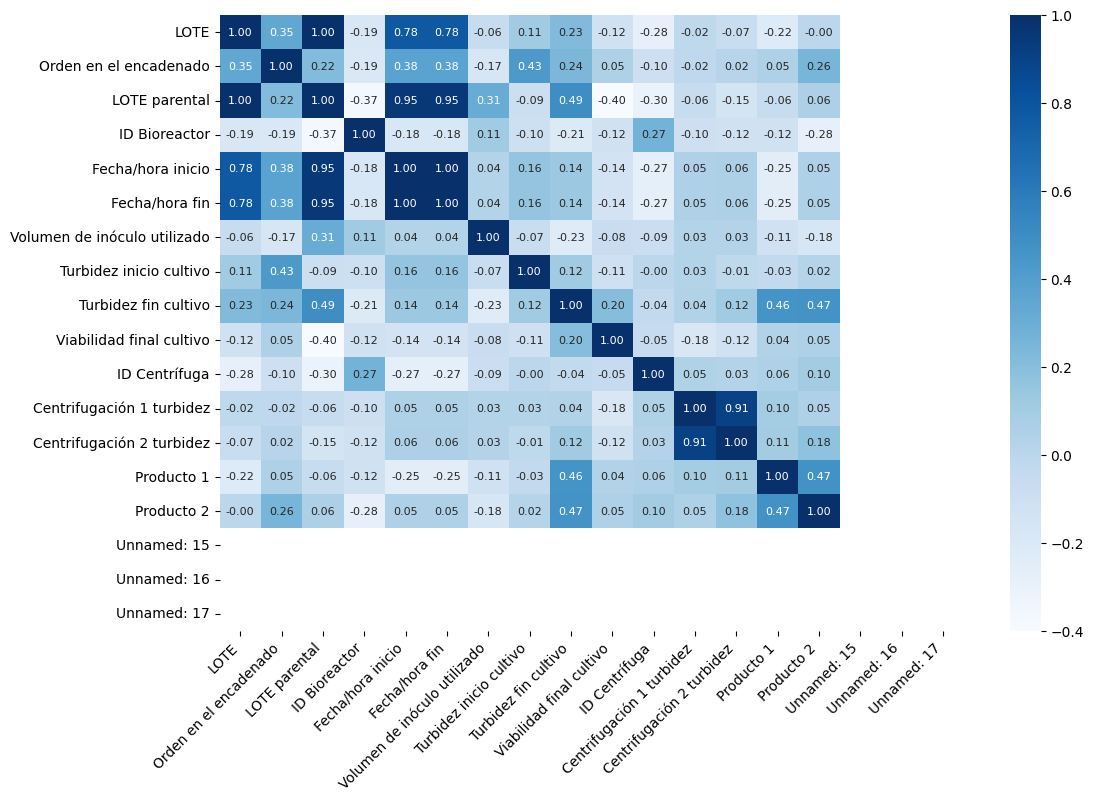

In [16]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Generar el heatmap
sns.heatmap(df_prod_fin.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="Blues")

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()

In [17]:
X = df_prod_fin.drop(['Producto 1', 'Fecha/hora inicio','Unnamed: 15','Fecha/hora fin', 'Unnamed: 16','Unnamed: 17'],axis='columns')
X

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 2
0,23019,1,NaN,14615,82.4,17.3,91.2,184000000.0,17825,NaN,NaN,6.0
1,23020,1,NaN,14616,80.4,18.8,91.2,182000000.0,14246,NaN,NaN,6.6
2,23021,1,NaN,13170,66.4,16.2,86.4,248000000.0,17825,NaN,NaN,8.1
3,23022,1,NaN,14614,85.6,18.5,83.2,230000000.0,12912,NaN,NaN,5.9
4,23023,1,NaN,14615,77.6,17.1,74.4,133000000.0,17825,26.6,20.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,NaN,14617,84.0,19.0,73.0,165000000.0,12912,31.0,17.0,4.9
148,24050,1,NaN,14614,84.0,18.0,68.0,152000000.0,6379,29.0,27.0,3.7
149,24051,1,NaN,13169,84.0,18.0,81.0,161000000.0,12912,33.0,19.0,5.5
150,24052,2,24050.0,14614,86.0,17.0,69.0,148000000.0,14246,24.0,18.0,6.0


In [18]:
y = df_prod_fin["Producto 1"]
y

0      1747.9
1      1676.2
2      1928.5
3      1782.8
4      1861.8
        ...  
147    1342.8
148    1422.8
149    1486.6
150    1857.3
151    1784.1
Name: Producto 1, Length: 152, dtype: float64

In [19]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state = 42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(121, 12)
(31, 12)
(121,)
(31,)


In [21]:
# rf = RandomForestRegressor(n_jobs=-1)
xgb = XGBRegressor(max_depth=1)
xgb.fit(X_train,y_train)
# rf.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
predictions = xgb.predict(X_test)
predictions

array([1242.2377, 1399.5442, 1958.6024, 1838.6233, 1660.2665, 1501.7465,
       1876.7897, 1838.3215, 1460.0487, 1807.4098, 1728.1395, 1595.3976,
       1884.587 , 1436.9504, 1436.6713, 1579.4005, 1543.009 , 1767.2614,
       1860.026 , 1446.1915, 1362.8591, 1447.0526, 1689.7452, 1634.0181,
       1440.739 , 1074.2878, 1749.8765, 1703.313 , 1572.1903, 1490.9056,
       1725.211 ], dtype=float32)

In [23]:
xgb.score(X_test,y_test)

0.630937879504764

In [24]:
# METRICAS DE TEST, LAS BUENAS, HACEOS LA PREGUNTA: QUE TAL LO ESTAMOS HACIENDO?
print('MAE test', mean_absolute_error(y_test, predictions))
print('MAPE test', mean_absolute_percentage_error(y_test, predictions))
print('MSE test', mean_squared_error(y_test, predictions))# si esto
print('RMSE test', np.sqrt(mean_squared_error(y_test, predictions)))# y esto se parece, fallo mucho, por poco, si no se parecen, fallo mucho, pocas veces
print('R2 score test', r2_score(y_test, predictions))# porcentual de aciertos

MAE test 120.20003307711691
MAPE test 0.0829303613015943
MSE test 24714.09695920275
RMSE test 157.20717845951802
R2 score test 0.630937879504764
